In [1]:
import os
import sys

os.environ["ETX4VELO_REPO"] = os.path.abspath(os.path.join("../.."))
sys.path.append(os.environ["ETX4VELO_REPO"])
from setup.setup import setup_envvars

setup_envvars()

In [2]:
from tqdm.auto import tqdm
import torch

from utils.commonutils.config import load_config
from pipeline import load_trained_model
import matplotlib.pyplot as plt

from utils.plotutils.plotconfig import configure_matplotlib

configure_matplotlib()

CONFIG = "../pipeline_configs/focal-loss-nopid-triplets-embedding-3-withspillover-new.yaml"


In [3]:
config = load_config(CONFIG)
config["embedding"][
    "query_particle_requirement"
] = "(abs(pid) != 11) and has_velo and has_scifi"

In [4]:
embedding_model = load_trained_model(path_or_config=config, step="embedding")

In [5]:
embedding_model.load_partition("minbias-sim10b-xdigi_v2.4_1496", n_events=100)

  0%|          | 0/100 [00:00<?, ?it/s]

In [6]:
batch = embedding_model.testset[0].cuda()
all_features = batch["x"]
true_edge_indices = batch["signal_true_edges"]
planes = batch["plane"]


In [7]:
import pandas as pd

df_hits = pd.DataFrame(
    {
        "un_x": batch.un_x.cpu().numpy(),
        "un_y": batch.un_y.cpu().numpy(),
        "un_z": batch.un_z.cpu().numpy(),
    }
)

In [8]:
df_hits

un_x      un_y     un_z
0      6.49478 -27.41810 -288.141
1      6.88369 -39.24090 -286.859
2      2.54735 -13.08680 -288.141
3     -8.34209  -1.88621 -288.141
4     -1.71120 -21.54550 -288.141
...        ...       ...      ...
1820  25.35680  16.48970  750.641
1821  -2.50846  44.93840  750.641
1822  10.63670  -3.24739  750.641
1823  32.92110  -1.69175  749.359
1824  -2.11955  15.98410  749.359

[1825 rows x 3 columns]

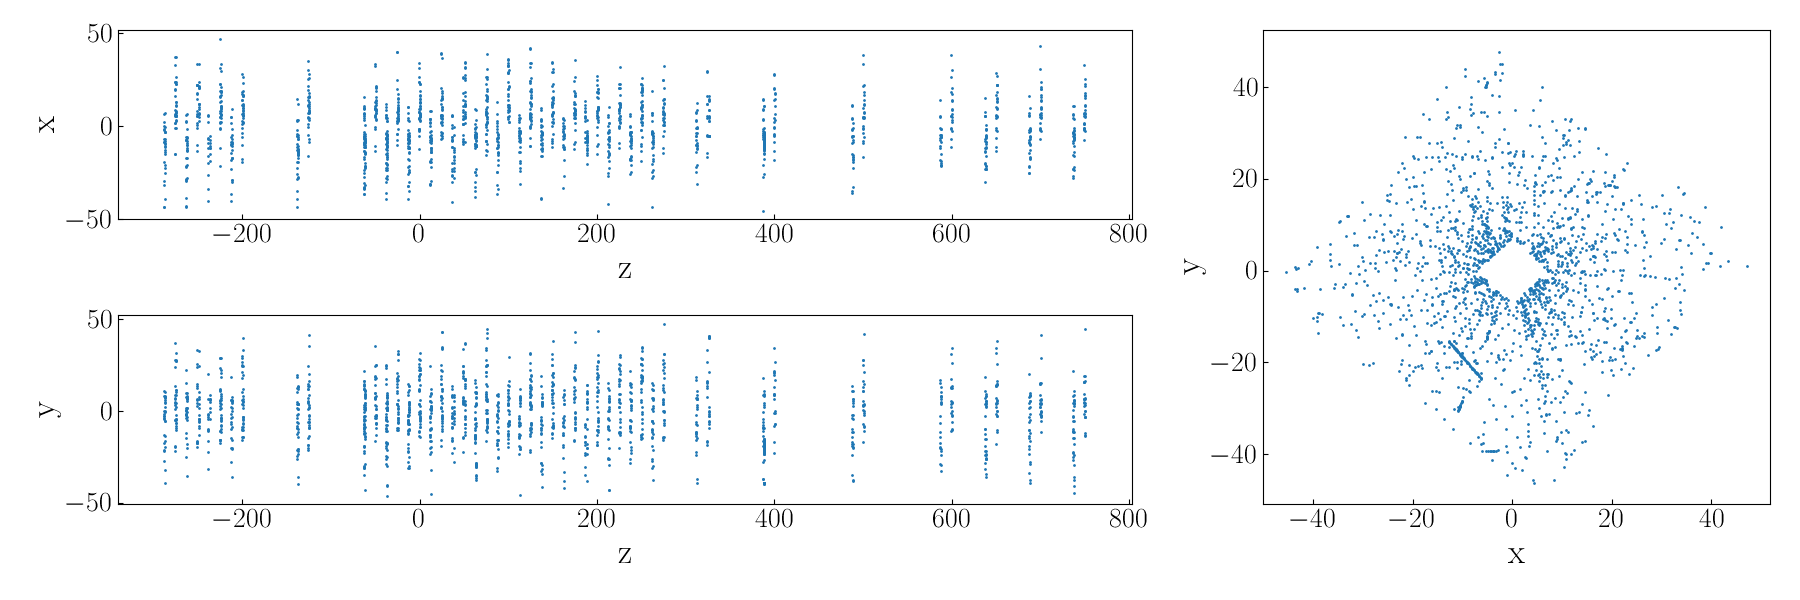

In [53]:
%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(18, 18 / 3.0))
gs = GridSpec(2, 2, figure=fig, width_ratios=(2.0, 1), height_ratios=(1, 1))

mpl_axes = {
    ("z", "x") : fig.add_subplot(gs[0, 0]),
    ("z", "y") : fig.add_subplot(gs[1, 0]),
    ("x", "y") : fig.add_subplot(gs[:, 1]),
}

# mpl_axes["z", "x"].set_aspect(4, adjustable='box')
# mpl_axes["z", "y"].set_aspect(4, adjustable='box')
# mpl_axes["x", "y"].set_aspect(4, adjustable='box')

for axes, mpl_ax in mpl_axes.items():
    mpl_ax.set_xlabel(axes[0])
    mpl_ax.set_ylabel(axes[1])
    mpl_ax.scatter(
        df_hits["un_" + axes[0]],
        df_hits["un_" + axes[1]],
        s=1,
    )

fig.subplots_adjust(hspace=-1.0, wspace=-1.0, left=0.0, right=1.0, bottom=0.0, top=1.0)

fig.tight_layout()
# def onclick(event):
#     if event.inaxes is not None:  # Check if click is inside the axes
#         z, x = event.xdata, event.ydata
        
#         a = ('button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
#               (event.button, event.x, event.y, event.xdata, event.ydata))
#         ax.set_title(a)

# fig.canvas.mpl_connect('button_press_event',onclick)

plt.draw()


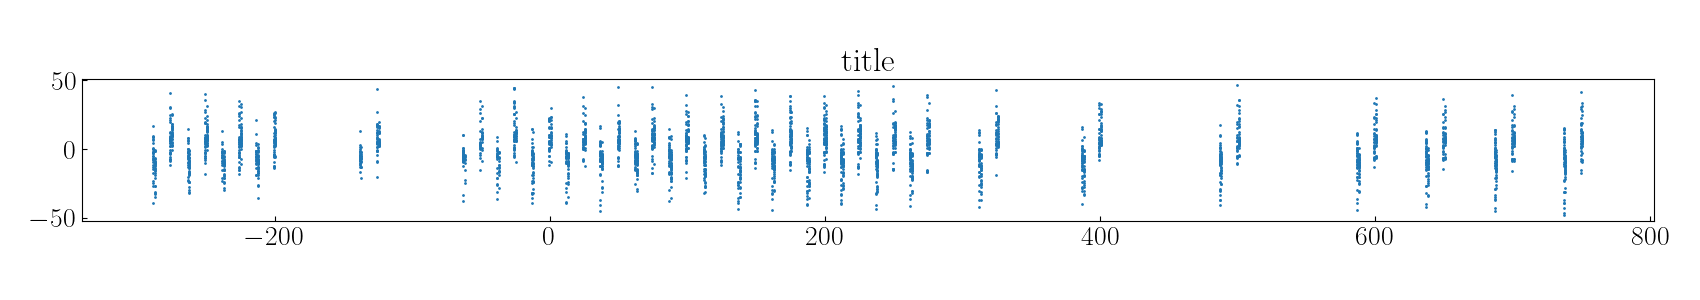

In [44]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(17, 3))
ax.scatter(
    batch.un_z.cpu().numpy(),
    batch.un_x.cpu().numpy(),
    s=1,
)
ax.set_aspect('equal')
ax.set_title("title")
fig.tight_layout()
def onclick(event):
    if event.inaxes is not None:  # Check if click is inside the axes
        z, x = event.xdata, event.ydata
        
        a = ('button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
              (event.button, event.x, event.y, event.xdata, event.ydata))
        ax.set_title(a)

fig.canvas.mpl_connect('button_press_event',onclick)

plt.draw()

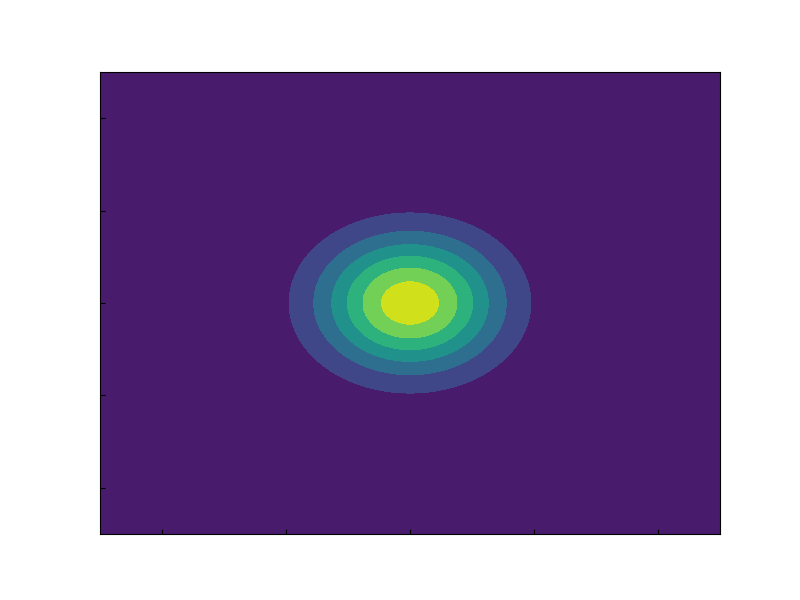

In [11]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

def compute_2d_gaussian(x, y, mx, my, sigma=1):
    return np.exp(-((x - mx)**2 + (y - my)**2) / (2 * sigma**2))

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = compute_2d_gaussian(X, Y, 0, 0)

fig, ax = plt.subplots()
contour = plt.contourf(X, Y, Z)

def onclick(event):
    if event.inaxes is not None:  # Check if click is inside the axes
        mx, my = event.xdata, event.ydata
        Z = compute_2d_gaussian(X, Y, mx, my)
        plt.clf()
        plt.contourf(X, Y, Z)
        plt.draw()

fig.canvas.mpl_connect('button_press_event',onclick)
plt.show()
plt.draw()